<h1>Project Title: Flight Delay Prediction</h1>

<p><b>Project Idea:</b> This project aims to predict flight delays using machine learning algorithms. By analyzing various factors like weather, carrier information, and flight history, the goal is to identify the flights that are most likely to be delayed, which would help in better resource management and passenger satisfaction. </p>

# **1. Installing Packages:**

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c8c5665a34ec36b77dc7c45b9491b4dc691cbe28c061ced0a3796f7f7fe5a7d7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
!pip install category_encoders==2.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.8 MB/s eta 0:00:00


# **2. Importing Libraries & Packags:**


In [ ]:
import pandas as pd
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import category_encoders as ce
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from ydata_profiling import ProfileReport

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score, KFold , cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import L1,L2
from tensorflow.keras.activations import relu,tanh,sigmoid

# **3. Connect notebook with googal drive:**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4. Data Loading and Initial Exploration:**

In [ ]:
path = "/content/drive/MyDrive/Forcasting Project dataset/DelayData.csv"
data = pd.read_csv(path)
data.head(10)

,depdelay,arrdelay,scheduleddepartdatetime,origin,dest,uniquecarrier,marketshareorigin,marketsharedest,hhiorigin,hhidest,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,nonhubairportdest,smallhubairportdest,mediumhubairportdest,largehubairportdest,nonhubairlineorigin,smallhubairlineorigin,mediumhubairlineorigin,largehubairlineorigin,nonhubairlinedest,smallhubairlinedest,mediumhubairlinedest,largehubairlinedest,year,month,dayofmonth,dayofweek,scheduledhour,originairportid,destairportid,tailnum,capacity,loadfactor,numflights,origincityname,originstate,distance,monopolyroute,temperature,temp_ninfty_n10,temp_n10_0,temp_0_10,temp_10_20,temp_20_30,temp_30_40,temp_40_infty,windspeed,windspeedsquare,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita
0,0,-4.0,08-Jan-2004 15:25:00,ELP,SAT,WN,0.618467,0.407567,0.417090,0.226878,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,2004,1,8,4,15,11540,14683,N686,2,0.460607,19.579000,"El Paso, TX",TX,496,1,15.340000,0,0,0,1,0,0,0,10.300000,106.090000,0,0.0,0,0,0,0,702433,27314.633,1843927,35005.234
1,-4,11.0,22-Jan-2004 14:40:00,ATL,MSY,DL,0.500757,0.096321,0.319589,0.196657,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,2004,1,22,4,14,10397,13495,N110DL,2,0.617904,19.548000,"Atlanta, GA",GA,425,0,11.500000,0,0,0,1,0,0,0,13.666667,186.777778,0,0.0,0,0,0,0,4802300,49081.773,1314721,48848.234
2,3,12.0,29-Jan-2004 12:25:00,DFW,JFK,DL,0.060898,0.131962,0.296126,0.214357,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,2004,1,29,4,12,11298,12478,N933DL,142,0.455929,19.545000,"Dallas/Fort Worth, TX",TX,1391,0,12.218868,0,0,0,1,0,0,0,13.528302,183.014952,0,0.0,0,0,0,0,5689982,50588.563,18747431,57295.402
3,-3,24.0,14-Jan-2004 15:55:00,SEA,EWR,CO,0.040522,0.347744,0.234712,0.249377,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,2004,1,14,3,15,14747,11618,N18243,149,0.534314,19.261000,"Seattle, WA",WA,2401,0,9.000000,0,0,1,0,0,0,0,0.000000,0.000000,0,0.0,1,0,0,0,3163703,57755.547,18747431,57295.402
4,0,-8.0,14-Jan-2004 18:40:00,SLC,RNO,OO,0.506899,0.176493,0.341763,0.277364,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,2004,1,14,3,18,14869,14570,N443SW,55,0.742125,19.261000,"Salt Lake City, UT",UT,422,0,-11.466667,1,0,0,0,0,0,0,7.666667,58.777778,0,0.0,0,0,0,0,1030597,45043.602,385049,49079.727
5,-1,-2.0,21-Jan-2004 20:00:00,ATL,DAY,DL,0.500757,0.164852,0.319589,0.143940,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,2004,1,21,3,20,10397,11267,N999DN,142,0.772382,19.254999,"Atlanta, GA",GA,432,0,5.971667,0,0,1,0,0,0,0,7.766667,60.321111,0,0.0,0,0,0,0,4802300,49081.773,845594,39588.855
6,0,-4.0,22-Jan-2004 12:30:00,ATL,CAK,OH,0.089014,0.511299,0.319589,0.420254,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,2004,1,22,4,12,10397,10874,N924CA,55,0.776642,19.548000,"Atlanta, GA",GA,528,0,9.150000,0,0,1,0,0,0,0,13.000000,169.000000,0,0.0,0,0,0,0,4802300,49081.773,700587,36796.859
7,-7,5.0,22-Jan-2004 09:45:00,CVG,DTW,NW,0.004069,0.753891,0.386330,0.575110,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,2004,1,22,4,9,11193,11433,N8908E,85,0.183107,19.548000,"Cincinnati, OH",KY,229,0,-3.025000,0,1,0,0,0,0,0,16.500000,272.250000,0,0.0,0,0,0,0,2083905,43024.180,4498311,45493.832
8,0,2.0,18-Jan-2004 14:00:00,OAK,LAX,WN,0.610661,0.171026,0.396435,0.136749,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,2004,1,18,7,14,13796,12892,N710,6,0.578127,18.440001,"Oakland, CA",CA,337,0,12.883333,0,0,0,1,0,0,0,13.233333,175.121111,0,0.0,0,0,0,0,4143522,64955.418,12764590,49943.961
9,-7,1.0,31-Jan-2004 21:00:00,DEN,MSP,UA,0.561684,0.048554,0.361966,0.590463,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,2004,1,31,6,21,11292,13487,N854UA,179,0.665976,16.697001,"Denver, CO",CO,680,0,-4.400000,0,1,0,0,0,0,0,0.700000,0.490000,0,0.0,0,0,1,0,2321712,52610.918,3106569,55211.586


In [ ]:
data.shape

(1201664, 61)

In [ ]:
data.columns

Index(['depdelay', 'arrdelay', 'scheduleddepartdatetime', 'origin', 'dest',
       'uniquecarrier', 'marketshareorigin', 'marketsharedest', 'hhiorigin',
       'hhidest', 'nonhubairportorigin', 'smallhubairportorigin',
       'mediumhubairportorigin', 'largehubairportorigin', 'nonhubairportdest',
       'smallhubairportdest', 'mediumhubairportdest', 'largehubairportdest',
       'nonhubairlineorigin', 'smallhubairlineorigin',
       'mediumhubairlineorigin', 'largehubairlineorigin', 'nonhubairlinedest',
       'smallhubairlinedest', 'mediumhubairlinedest', 'largehubairlinedest',
       'year', 'month', 'dayofmonth', 'dayofweek', 'scheduledhour',
       'originairportid', 'destairportid', 'tailnum', 'capacity', 'loadfactor',
       'numflights', 'origincityname', 'originstate', 'distance',
       'monopolyroute', 'temperature', 'temp_ninfty_n10', 'temp_n10_0',
       'temp_0_10', 'temp_10_20', 'temp_20_30', 'temp_30_40', 'temp_40_infty',
       'windspeed', 'windspeedsquare', 'windgustd

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201664 entries, 0 to 1201663
Data columns (total 61 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   depdelay                 1201664 non-null  int64  
 1   arrdelay                 1198458 non-null  float64
 2   scheduleddepartdatetime  1201664 non-null  object 
 3   origin                   1201664 non-null  object 
 4   dest                     1201664 non-null  object 
 5   uniquecarrier            1201664 non-null  object 
 6   marketshareorigin        1201664 non-null  float64
 7   marketsharedest          1201664 non-null  float64
 8   hhiorigin                1201664 non-null  float64
 9   hhidest                  1201664 non-null  float64
 10  nonhubairportorigin      1201664 non-null  int64  
 11  smallhubairportorigin    1201664 non-null  int64  
 12  mediumhubairportorigin   1201664 non-null  int64  
 13  largehubairportorigin    1201664 non-null 

In [ ]:
data.describe()

,depdelay,arrdelay,marketshareorigin,marketsharedest,hhiorigin,hhidest,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,nonhubairportdest,smallhubairportdest,mediumhubairportdest,largehubairportdest,nonhubairlineorigin,smallhubairlineorigin,mediumhubairlineorigin,largehubairlineorigin,nonhubairlinedest,smallhubairlinedest,mediumhubairlinedest,largehubairlinedest,year,month,dayofmonth,dayofweek,scheduledhour,originairportid,destairportid,capacity,loadfactor,numflights,distance,monopolyroute,temperature,temp_ninfty_n10,temp_n10_0,temp_0_10,temp_10_20,temp_20_30,temp_30_40,temp_40_infty,windspeed,windspeedsquare,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita
count,1.201664e+06,1.198458e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201204e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201204e+06,1.201204e+06,1.201664e+06,1.201204e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06
mean,9.378255e+00,5.419214e+00,3.261705e-01,3.277137e-01,3.174347e-01,3.191741e-01,2.105705e-01,1.584353e-01,2.243847e-01,4.066095e-01,2.193949e-01,1.590736e-01,2.217542e-01,3.997773e-01,5.375588e-01,1.702223e-01,1.941325e-01,9.808649e-02,5.460162e-01,1.685671e-01,1.898584e-01,9.555833e-02,2.011303e+03,6.582043e+00,1.573319e+01,3.926235e+00,1.304482e+01,1.266899e+04,1.266907e+04,1.280416e+02,7.881044e-01,1.748644e+01,7.741249e+02,3.919582e-01,1.723359e+01,8.562294e-03,5.751025e-02,1.765277e-01,3.174157e-01,3.477436e-01,8.813529e-02,3.340368e-03,8.793900e+00,1.054543e+02,2.484030e-01,3.125842e+00,7.891058e-02,6.104701e-02,5.262702e-03,1.023414e-02,4.861220e+06,5.915507e+04,4.825369e+06,5.889775e+04
std,3.480794e+01,3.734165e+01,2.445058e-01,2.466738e-01,1.780741e-01,1.813356e-01,4.077140e-01,3.651488e-01,4.171766e-01,4.912010e-01,4.138369e-01,3.657448e-01,4.154268e-01,4.898526e-01,4.985876e-01,3.758281e-01,3.955315e-01,2.974317e-01,4.978782e-01,3.743693e-01,3.921891e-01,2.939847e-01,3.867802e+00,3.392369e+00,8.776480e+00,1.987379e+00,4.706053e+00,1.549079e+03,1.550503e+03,5.927833e+01,1.107904e-01,2.057939e+00,5.656575e+02,4.881876e-01,1.045730e+01,9.213570e-02,2.328151e-01,3.812687e-01,4.654709e-01,4.762543e-01,2.834917e-01,5.769933e-02,5.302983e+00,1.218364e+02,4.320869e-01,7.842746e+00,2.695993e-01,2.394166e-01,7.235337e-02,1.006450e-01,4.752627e+06,1.442690e+04,4.754789e+06,1.460815e+04
min,-8.660000e+02,-8.300000e+01,1.335886e-04,0.000000e+00,9.360347e-02,9.360347e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.612903e-02,9.791000e+00,2.800000e+01,0.000000e+00,-4.220000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.723976e+04,0.000000e+00,0.000000e+00
25%,-4.000000e+00,-1.200000e+01,1.252954e-01,1.253465e-01,1.956175e-01,1.956306e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.008000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.000000e+00,1.1292

In [ ]:
data.describe(include="object")

,scheduleddepartdatetime,origin,dest,uniquecarrier,tailnum,origincityname,originstate
count,1201664,1201664,1201664,1201664,1201664,1201664,1201664
unique,845653,259,330,19,5389,254,49
top,19-Mar-2013 06:00:00,ATL,ATL,WN,N630WN,"Atlanta, GA",CA
freq,14,87676,86114,328660,786,87676,149102


In [ ]:
data.isnull().sum()

,0
depdelay,0
arrdelay,3206
scheduleddepartdatetime,0
origin,0
dest,0
uniquecarrier,0
marketshareorigin,0
marketsharedest,0
hhiorigin,0
hhidest,0


In [ ]:
df = data.copy()

# **5. Feature Engineering:**

- **Creating Target Variable:**
    - Created a binary target variable `target` (1 for delayed, 0 for not delayed) based on `depdelay` and `arrdelay`.

In [ ]:
df['arrdelay'] = df['arrdelay'].fillna(df['arrdelay'].median())

In [ ]:
df['target'] = df.apply(lambda row: 1 if row['depdelay'] > 0 or row['arrdelay'] > 0 else 0, axis=1)

- **Combining Dummy Variables:**
    - Combined the dummy variables representing origin airport hub size (NonHubAirportOrigin, SmallHubAirportOrigin, MediumHubAirportOrigin, LargeHubAirportOrigin) into a single categorical column called `OriginHubSize`.
    - apply the same for all variables that have the same style

In [ ]:
df['OriginAirportHubSize'] = 0
df.loc[df['smallhubairportorigin'] == 1, 'OriginAirportHubSize'] = 1
df.loc[df['mediumhubairportorigin'] == 1, 'OriginAirportHubSize'] = 2
df.loc[df['largehubairportorigin'] == 1, 'OriginAirportHubSize'] = 3

In [ ]:
df['DestinationAirportHubSize'] = 0
df.loc[df['smallhubairportdest'] == 1, 'DestinationAirportHubSize'] = 1
df.loc[df['mediumhubairportdest'] == 1, 'DestinationAirportHubSize'] = 2
df.loc[df['largehubairportdest'] == 1, 'DestinationAirportHubSize'] = 3

In [ ]:
df['OriginAirlineHubSize'] = 0
df.loc[df['smallhubairlineorigin'] == 1, 'OriginAirlineHubSize'] = 1
df.loc[df['mediumhubairlineorigin'] == 1, 'OriginAirlineHubSize'] = 2
df.loc[df['largehubairlineorigin'] == 1, 'OriginAirlineHubSize'] = 3

In [ ]:
df['DestinationAirlinetHubSize'] = 0
df.loc[df['smallhubairlinedest'] == 1, 'DestinationAirlinetHubSize'] = 1
df.loc[df['mediumhubairlinedest'] == 1, 'DestinationAirlinetHubSize'] = 2
df.loc[df['largehubairlinedest'] == 1, 'DestinationAirlinetHubSize'] = 3

- **Binning/Range Splitting:**
  - We defined custom ranges (3) to group the temperature values into categories.
  - For example:
    - Temperatures between  below 0°C and 15 were categorized as "0"
    - Temperatures between 15°C and 25°C were categorized as "1"
    - Temperatures above 25°C were categorized as "2"

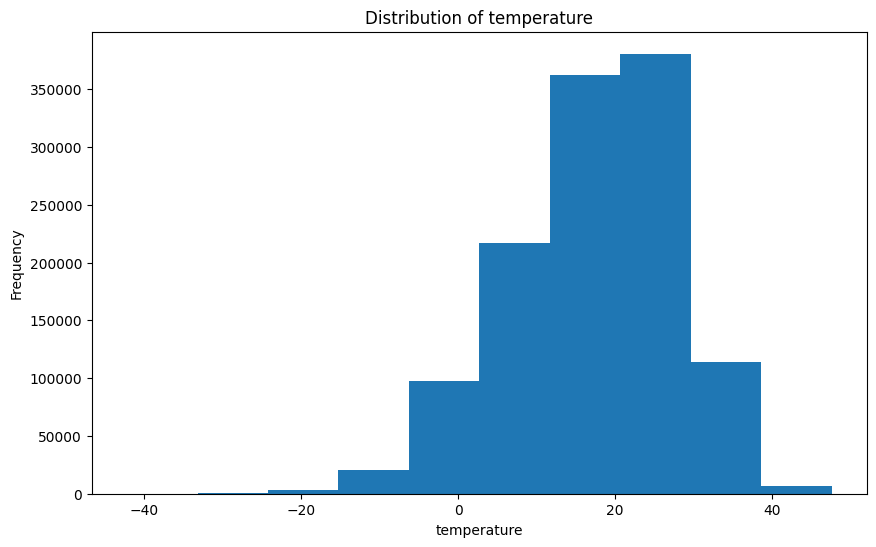

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['temperature'], bins=10)
plt.title(f'Distribution of temperature')
plt.xlabel('temperature')
plt.ylabel('Frequency')
plt.show()

In [ ]:
ranges = [-float("inf"), 15, 25, float("inf")]
labels = [0 , 1 , 2]

df["NewTemperature"] = pd.cut(df["temperature"], bins=ranges, labels=labels, right=False)

- **Drop unnecessary dummy columns and columns that has a week correlation with the target columns:**
  - the `scheduleddepartdatetime` column is not important because it is present in the data in more detail


In [ ]:
df.drop(columns=[
    "nonhubairportorigin" , "smallhubairportorigin" , "mediumhubairportorigin" , "largehubairportorigin",
    "nonhubairportdest" , "smallhubairportdest" , "mediumhubairportdest" , "largehubairportdest",
    "nonhubairlineorigin" , "smallhubairlineorigin" , "mediumhubairlineorigin" , "largehubairlineorigin",
    "nonhubairlinedest" , "smallhubairlinedest" , "mediumhubairlinedest" , "largehubairlinedest"
    ], inplace=True)

In [ ]:
df.drop(columns=[
    "temperature" , "temp_ninfty_n10" , "temp_n10_0" , "temp_0_10" ,
    "temp_10_20" , "temp_20_30" , "temp_30_40" , "temp_40_infty"
    ], inplace=True)

In [ ]:
df.drop(columns=['scheduleddepartdatetime'] , inplace=True)

# **6. Generate a Report file that descripte data:**

In [ ]:
#profile = ProfileReport(df, title="Profiling Report")

In [ ]:
#profile.to_file("Report.html")

# **7. Data Cleaning:**

7.1- Duplicated Values

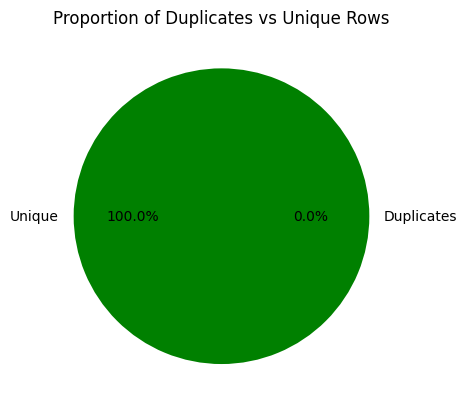

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

duplicates = df.duplicated()
duplicate_count = duplicates.sum()
unique_count = len(df) - duplicate_count

counts = {
    'Duplicates': duplicate_count,
    'Unique': unique_count
}

plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', colors=["red", "green"])
plt.title("Proportion of Duplicates vs Unique Rows")
plt.show()

7.2- Missing values

In [ ]:
df.isnull().sum()

,0
depdelay,0
arrdelay,0
origin,0
dest,0
uniquecarrier,0
marketshareorigin,0
marketsharedest,0
hhiorigin,0
hhidest,0
year,0


<Axes: >

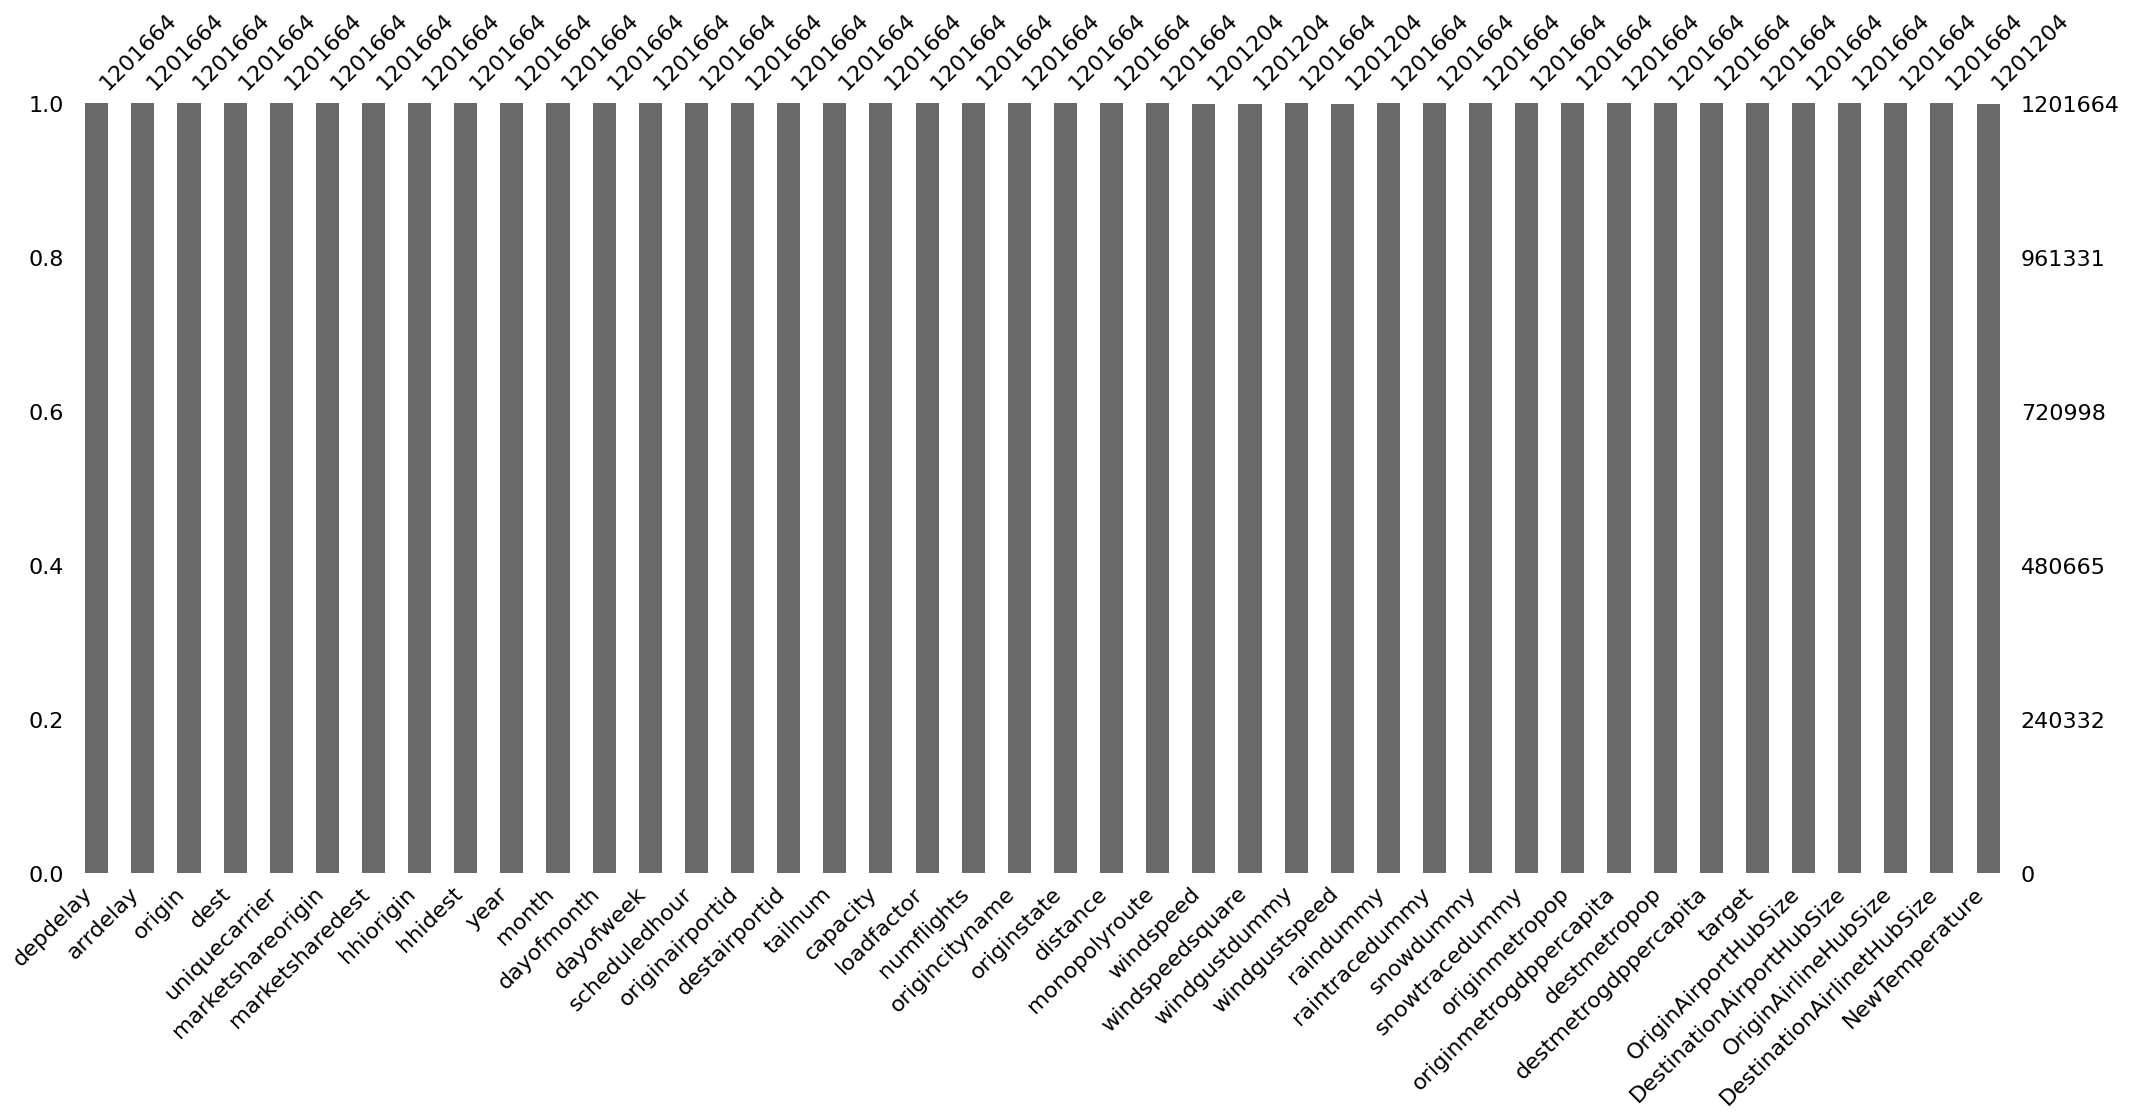

In [ ]:
# Shows the count of non-missing and missing data for each column.
mno.bar(df)

In [ ]:
df.dropna(inplace=True)

7.3- Outliers

,0
depdelay,"Axes(0.125,0.814746;0.133621x0.0652542)"
arrdelay,"Axes(0.285345,0.814746;0.133621x0.0652542)"
marketshareorigin,"Axes(0.44569,0.814746;0.133621x0.0652542)"
marketsharedest,"Axes(0.606034,0.814746;0.133621x0.0652542)"
hhiorigin,"Axes(0.766379,0.814746;0.133621x0.0652542)"
hhidest,"Axes(0.125,0.736441;0.133621x0.0652542)"
year,"Axes(0.285345,0.736441;0.133621x0.0652542)"
month,"Axes(0.44569,0.736441;0.133621x0.0652542)"
dayofmonth,"Axes(0.606034,0.736441;0.133621x0.0652542)"
dayofweek,"Axes(0.766379,0.736441;0.133621x0.0652542)"


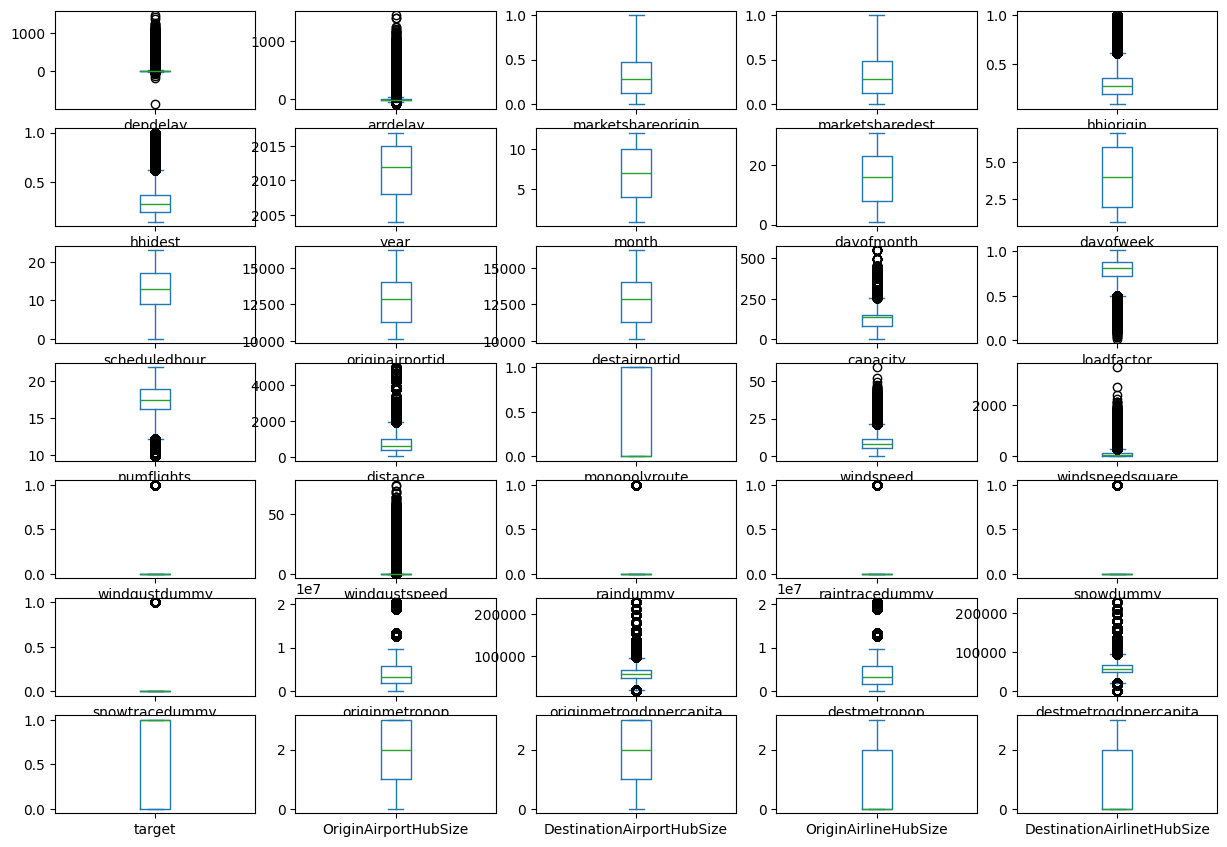

In [ ]:
df.plot(kind = "box" , subplots = True , figsize = (15,15) , layout = (10,5))

# **8. Data Visualization**

In [ ]:
DA = df.copy()

In [ ]:
hub_size_mapping = {0: "Non Hub", 1: "Small", 2: "Medium", 3: "Large"}
# Apply the mapping to the Hub Size columns
DA['OriginAirportHubSize'] = DA['OriginAirportHubSize'].map(hub_size_mapping)
DA['DestinationAirportHubSize'] = DA['DestinationAirportHubSize'].map(hub_size_mapping)
DA['OriginAirlineHubSize'] = DA['OriginAirlineHubSize'].map(hub_size_mapping)
DA['DestinationAirlinetHubSize'] = DA['DestinationAirlinetHubSize'].map(hub_size_mapping)

In [ ]:
temprature_mapping = {0: "-inf-15", 1: "15-25", 2: "25<"}
# Apply the mapping to the Hub Size columns
DA['NewTemperature'] = DA['NewTemperature'].map(temprature_mapping)

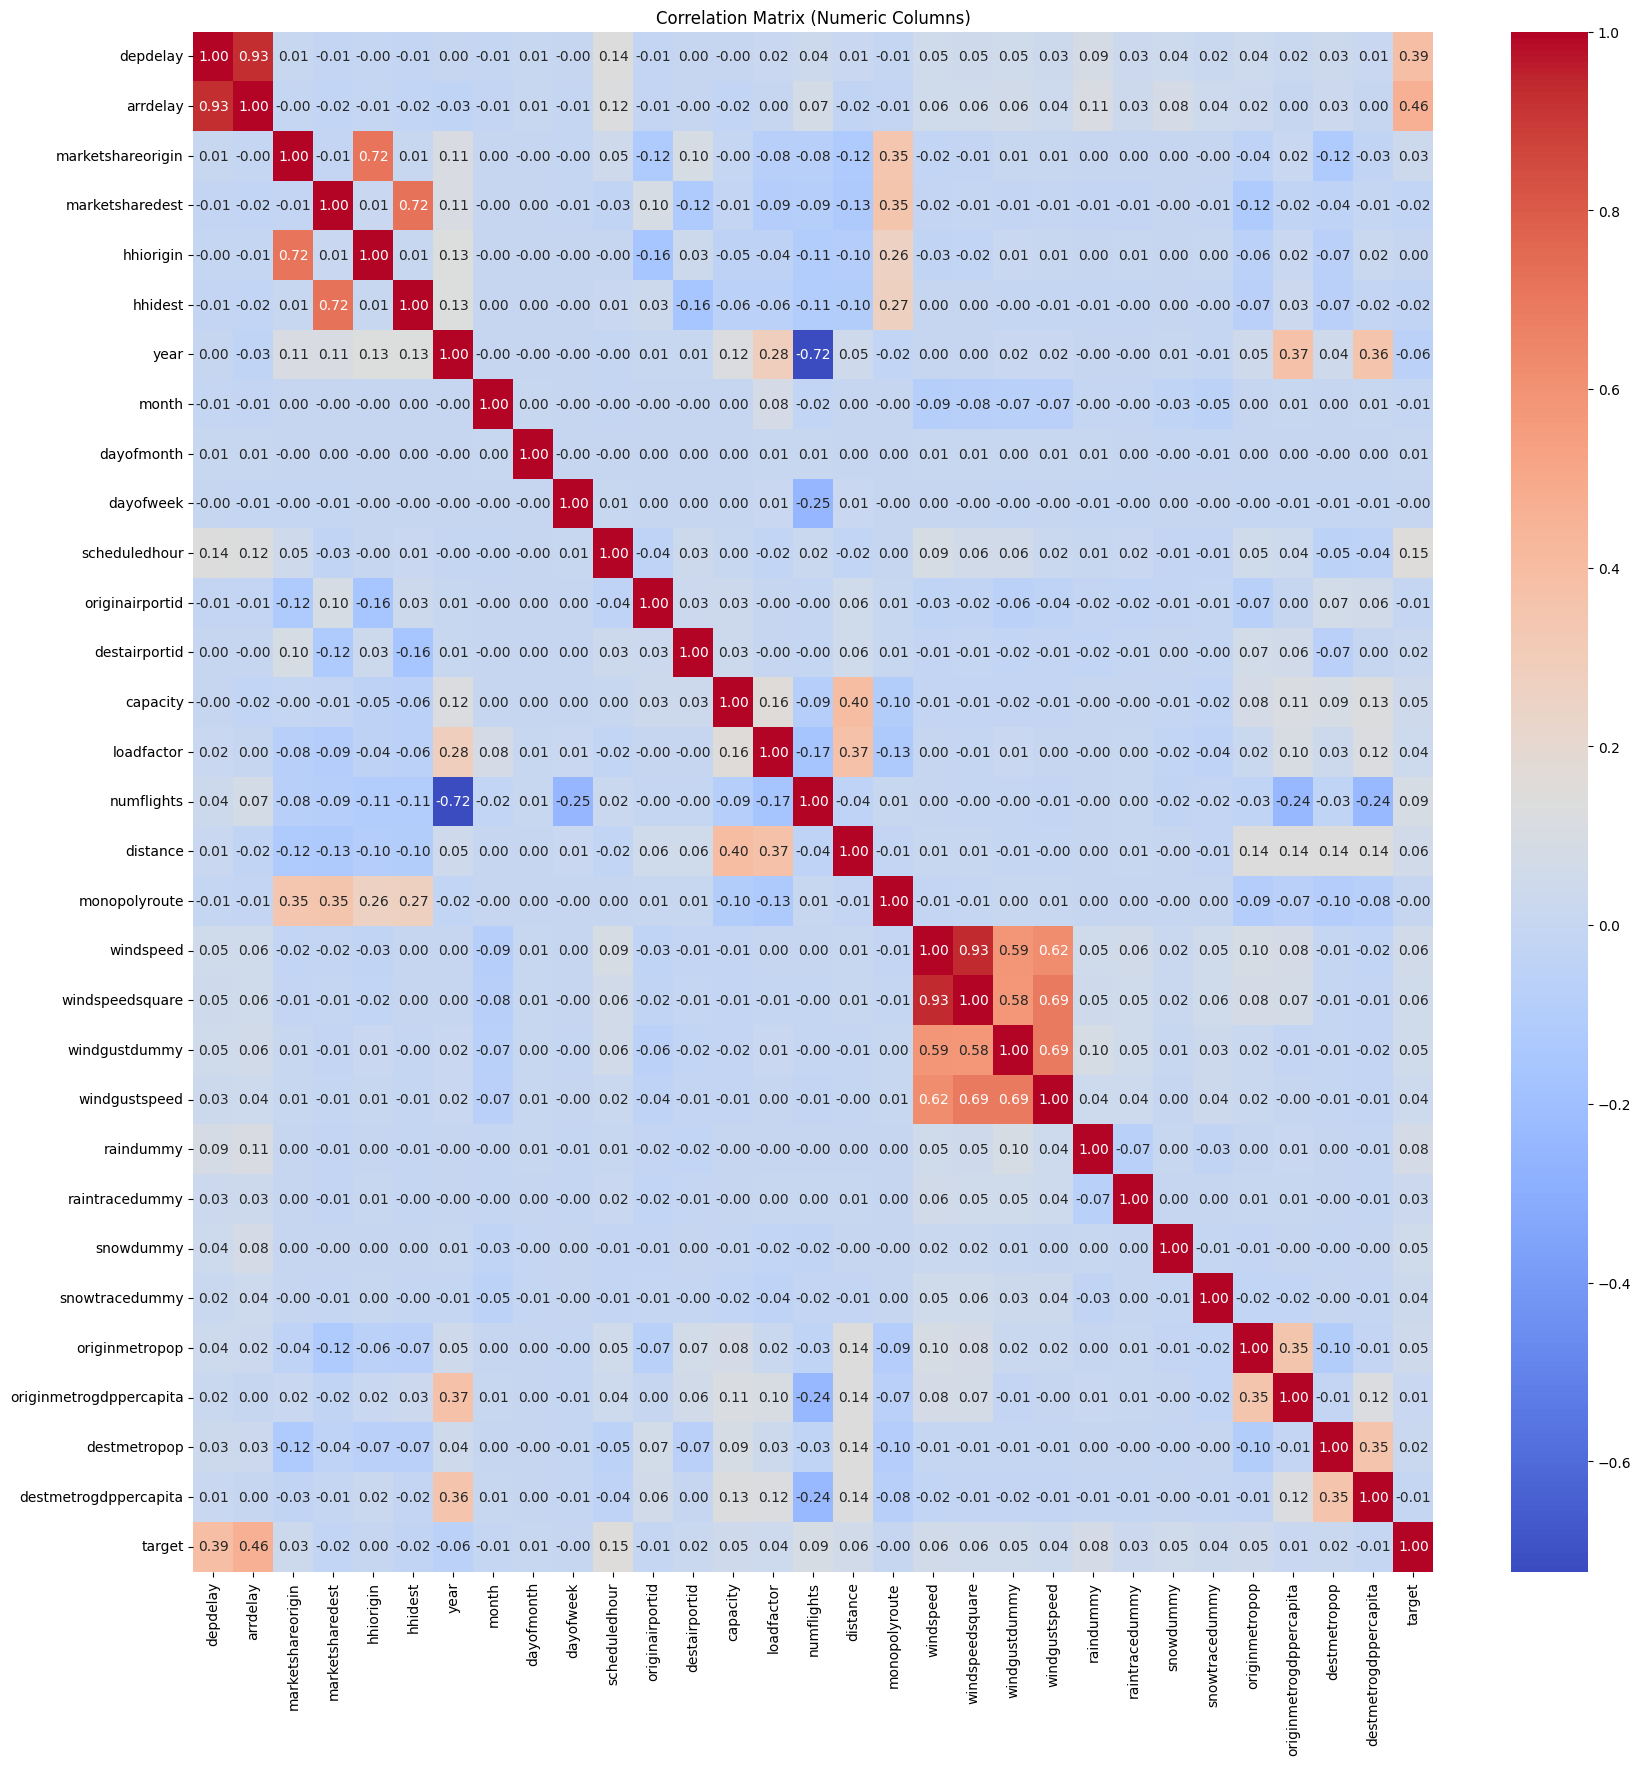

In [ ]:
numeric_DA = DA.select_dtypes(include=np.number)
correlation_matrix = numeric_DA.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

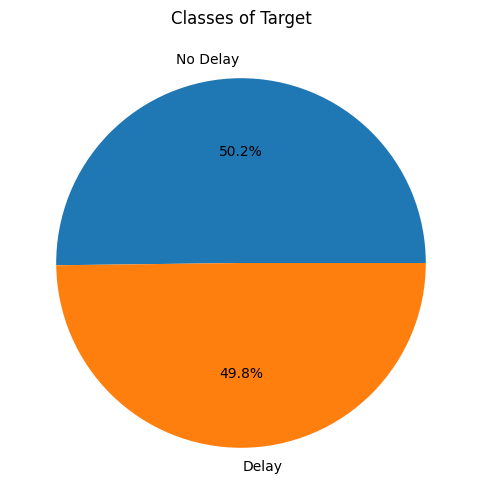

In [ ]:
classes_of_target = DA['target'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(classes_of_target, labels=['No Delay', 'Delay'], autopct='%1.1f%%')
plt.title('Classes of Target')
plt.show()

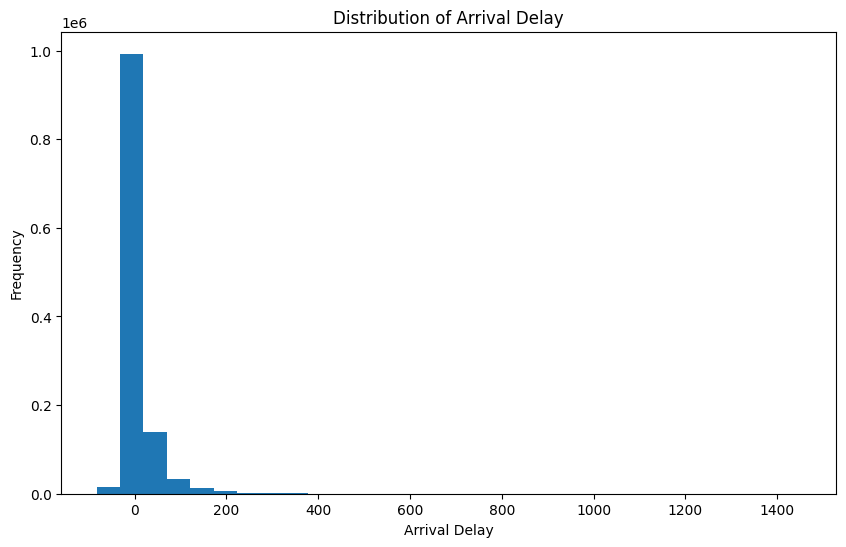

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(DA['arrdelay'], bins=30)  # Adjust 'bins' for desired granularity
plt.title(f'Distribution of Arrival Delay')
plt.xlabel("Arrival Delay")
plt.ylabel('Frequency')
plt.show()

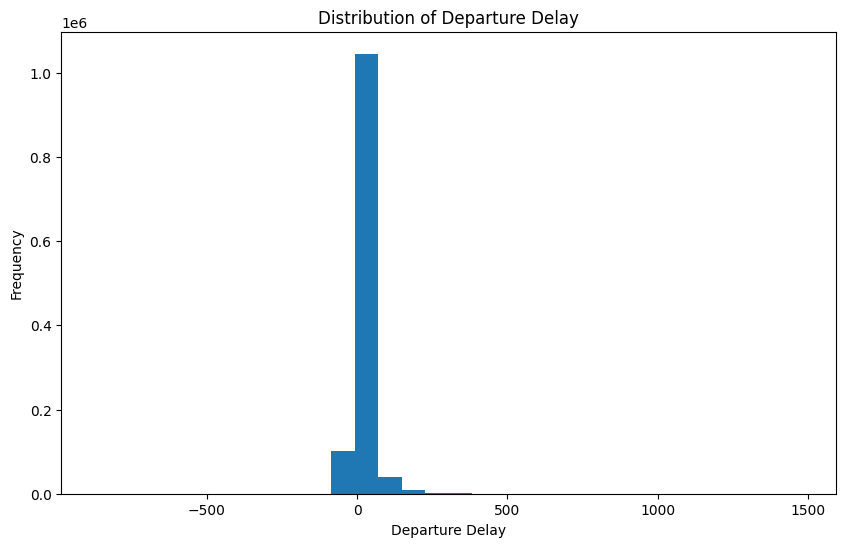

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(DA['depdelay'], bins=30)  # Adjust 'bins' for desired granularity
plt.title(f'Distribution of Departure Delay')
plt.xlabel("Departure Delay")
plt.ylabel('Frequency')
plt.show()

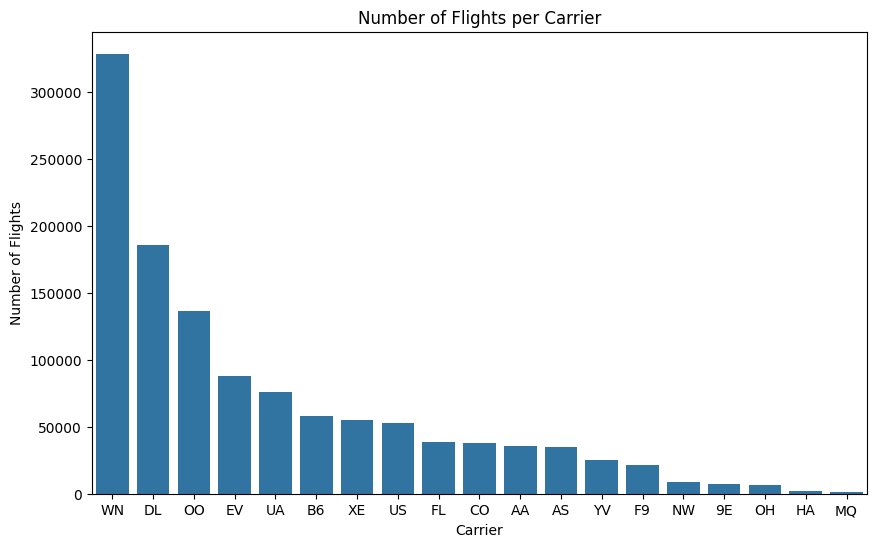

In [ ]:
number_of_flights_per_carrier = DA['uniquecarrier'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=number_of_flights_per_carrier.index, y=number_of_flights_per_carrier.values)
plt.title('Number of Flights per Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.show()

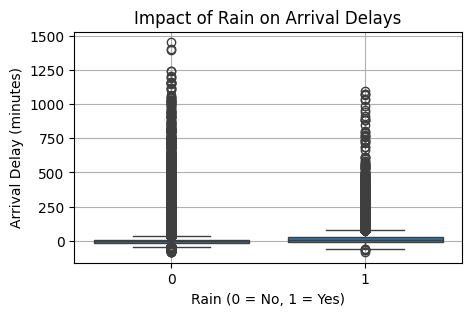

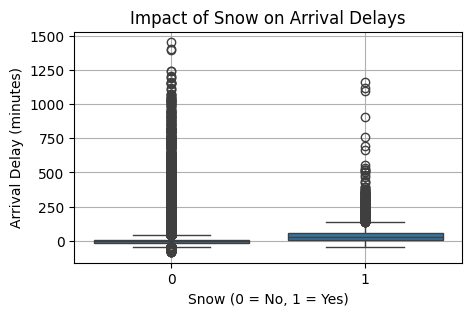

In [ ]:
#rain
plt.figure(figsize=(5, 3))
sns.boxplot(x='raindummy', y='arrdelay', data=df)
plt.title('Impact of Rain on Arrival Delays')
plt.xlabel('Rain (0 = No, 1 = Yes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid()
plt.show()
#snow
plt.figure(figsize=(5, 3))
sns.boxplot(x='snowdummy', y='arrdelay', data=df)
plt.title('Impact of Snow on Arrival Delays')
plt.xlabel('Snow (0 = No, 1 = Yes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid()
plt.show()

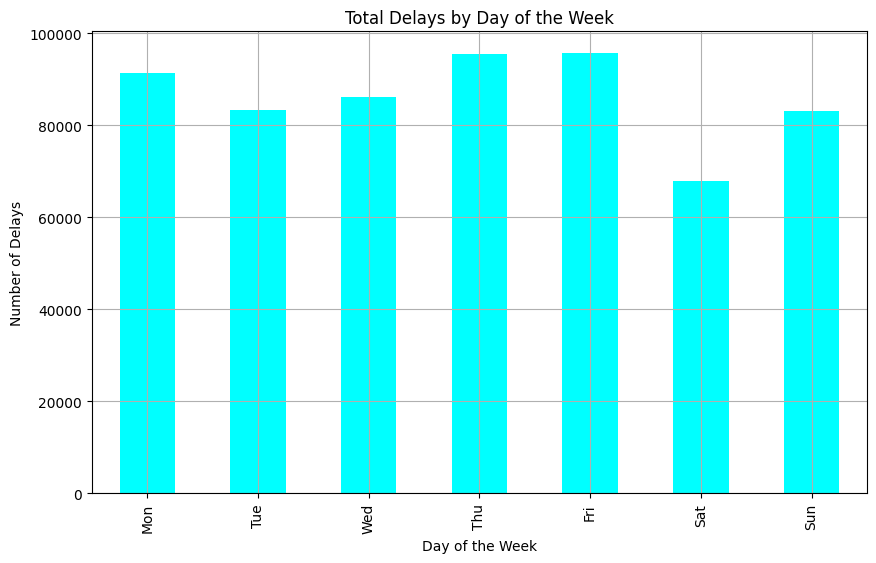

In [ ]:
day_of_week_delay_count = DA.groupby('dayofweek')['target'].sum()
plt.figure(figsize=(10, 6))
day_of_week_delay_count.plot(kind='bar', color='cyan')
plt.title('Total Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Delays')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid()
plt.show()

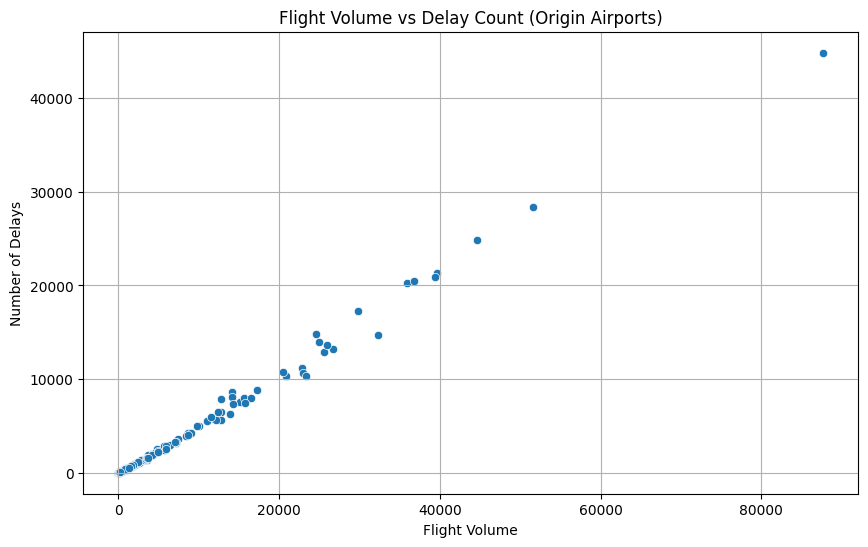

In [ ]:
volume_delay = DA.groupby('origin').agg(flight_volume=('origin', 'count'), delay_count=('target', 'sum'))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flight_volume', y='delay_count', data=volume_delay)
plt.title('Flight Volume vs Delay Count (Origin Airports)')
plt.xlabel('Flight Volume')
plt.ylabel('Number of Delays')
plt.grid()
plt.show()

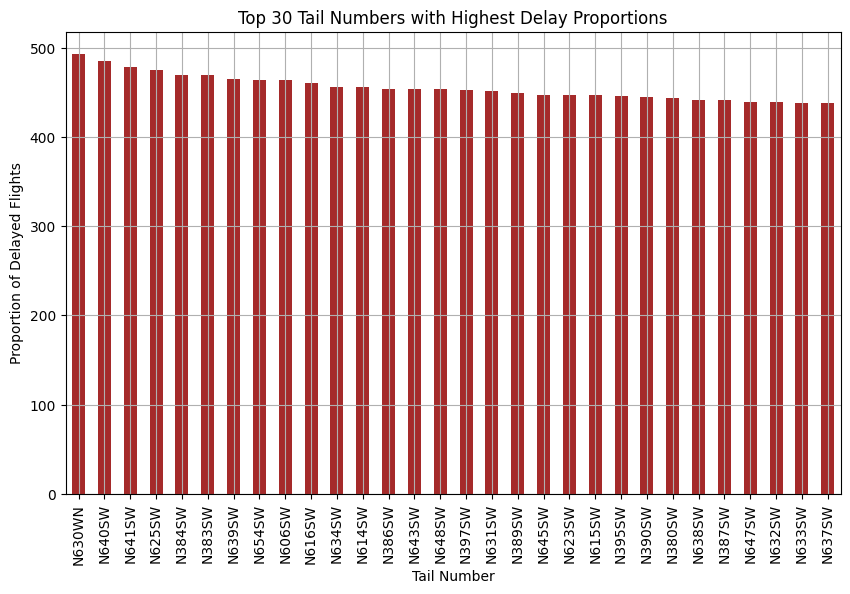

In [ ]:
tail_number_delays = DA.groupby('tailnum')['target'].sum().sort_values(ascending=False).head(30)
plt.figure(figsize=(10, 6))
tail_number_delays.plot(kind='bar', color='brown')
plt.title('Top 30 Tail Numbers with Highest Delay Proportions')
plt.xlabel('Tail Number')
plt.ylabel('Proportion of Delayed Flights')
plt.grid()
plt.show()

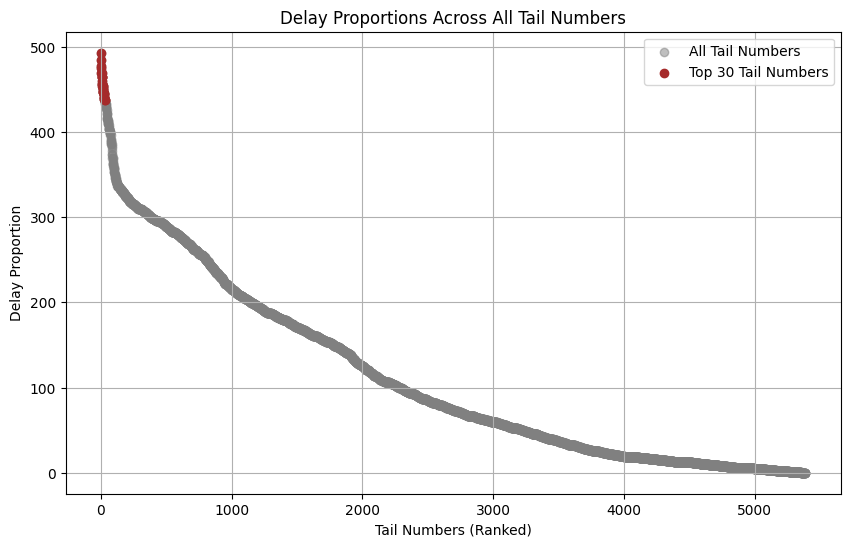

In [ ]:
delay_proportions = DA.groupby('tailnum')['target'].sum()
sorted_delays = delay_proportions.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_delays)), sorted_delays, alpha=0.5, color='gray', label='All Tail Numbers')
plt.scatter(range(30), sorted_delays.head(30), color='brown', label='Top 30 Tail Numbers')
plt.title('Delay Proportions Across All Tail Numbers')
plt.xlabel('Tail Numbers (Ranked)')
plt.ylabel('Delay Proportion')
plt.legend()
plt.grid()
plt.show()

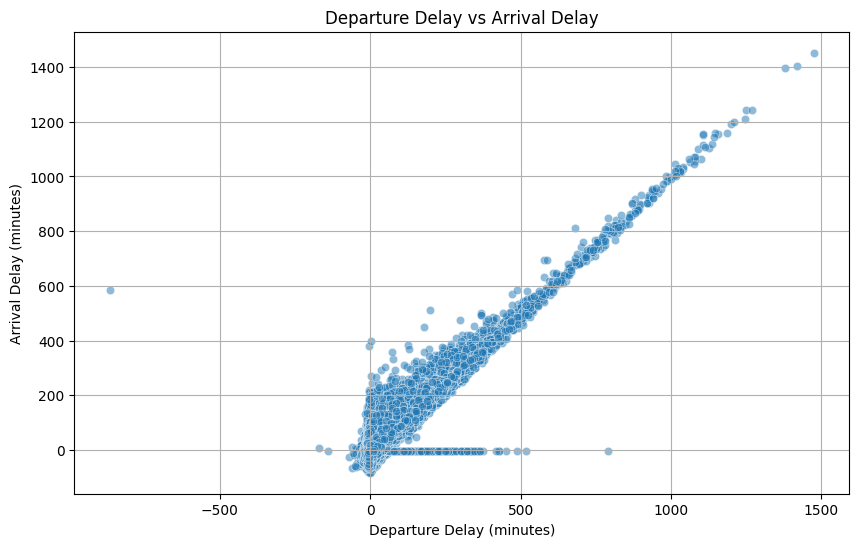

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depdelay', y='arrdelay', data=df, alpha=0.5)
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid()
plt.show()

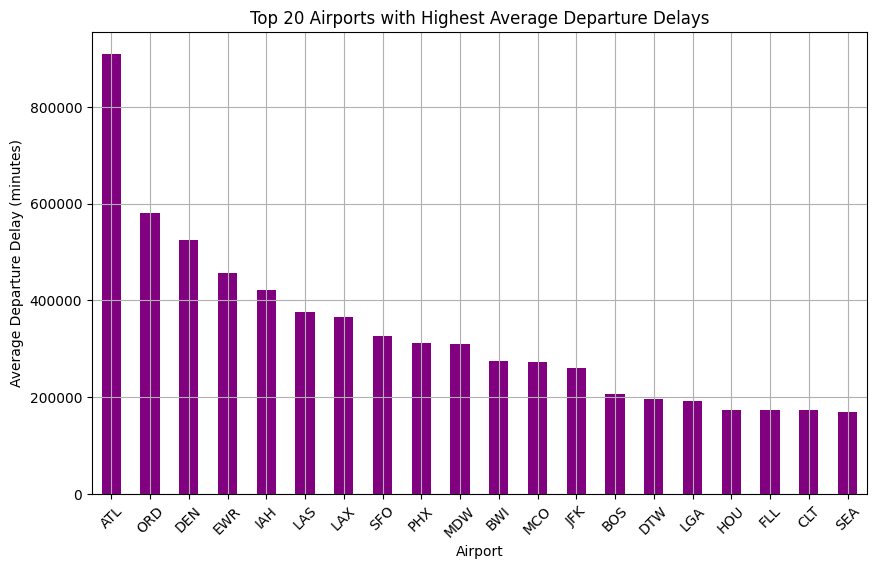

In [ ]:
airport_delays = DA.groupby('origin')['depdelay'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
airport_delays.plot(kind='bar', color='purple')
plt.title('Top 20 Airports with Highest Average Departure Delays')
plt.xlabel('Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

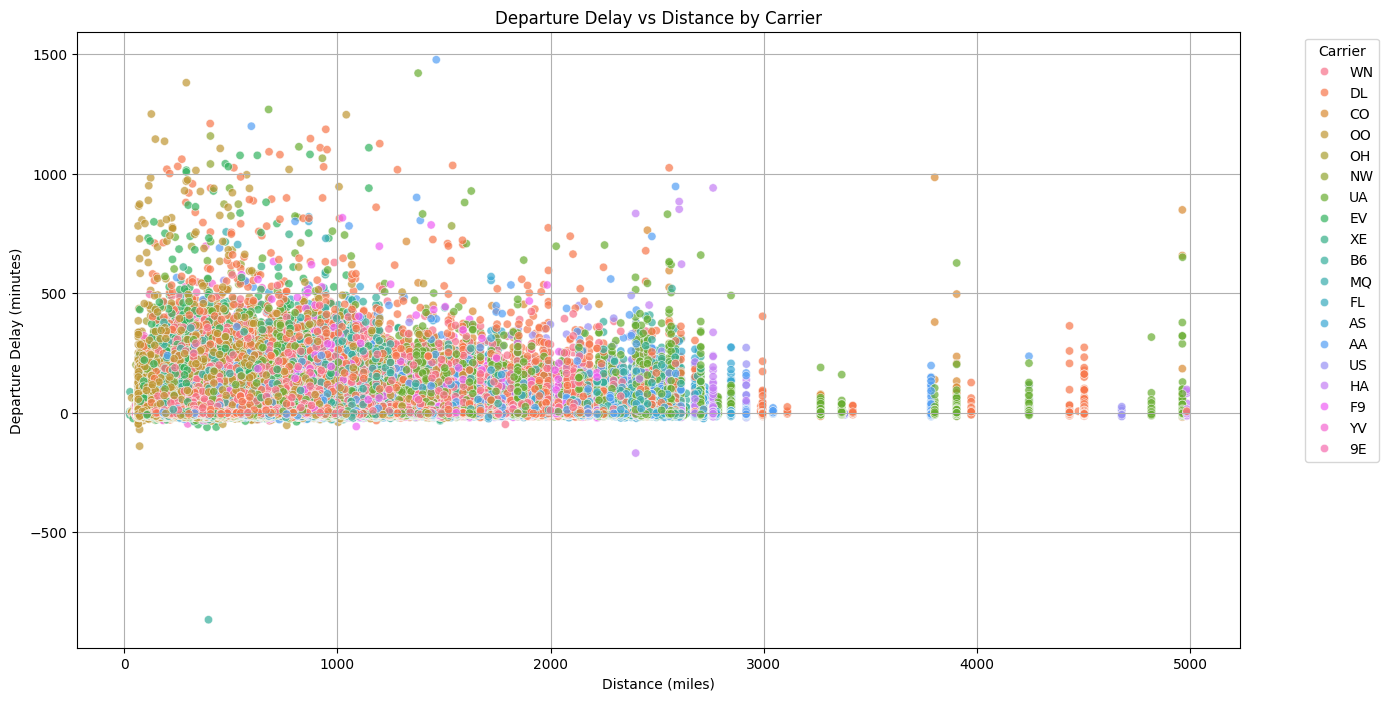

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='distance', y='depdelay', hue='uniquecarrier', data=DA, alpha=0.7)
plt.title('Departure Delay vs Distance by Carrier')
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')
plt.legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# **9. Feature Selection:**

To calculate the correlation between all variables and the target it should be in numric type so first , we need to encode the categorical columns

In [ ]:
# One-Hot Encoding for 'uniquecarrier' and converting boolean values to 0 and 1
df = pd.get_dummies(df, columns=['uniquecarrier'], drop_first=True)
df[[
    'uniquecarrier_AA', 'uniquecarrier_AS', 'uniquecarrier_B6', 'uniquecarrier_CO',
    'uniquecarrier_DL', 'uniquecarrier_EV', 'uniquecarrier_F9', 'uniquecarrier_FL',
    'uniquecarrier_HA', 'uniquecarrier_MQ', 'uniquecarrier_NW', 'uniquecarrier_OH',
    'uniquecarrier_OO', 'uniquecarrier_UA', 'uniquecarrier_US', 'uniquecarrier_WN',
    'uniquecarrier_XE', 'uniquecarrier_YV'
]] = df[[
    'uniquecarrier_AA', 'uniquecarrier_AS', 'uniquecarrier_B6', 'uniquecarrier_CO',
    'uniquecarrier_DL', 'uniquecarrier_EV', 'uniquecarrier_F9', 'uniquecarrier_FL',
    'uniquecarrier_HA', 'uniquecarrier_MQ', 'uniquecarrier_NW', 'uniquecarrier_OH',
    'uniquecarrier_OO', 'uniquecarrier_UA', 'uniquecarrier_US', 'uniquecarrier_WN',
    'uniquecarrier_XE', 'uniquecarrier_YV'
]].astype(int)

In [ ]:
df_encoded = df.copy()

In [ ]:
# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=['origincityname', 'originstate','origin','dest' , 'tailnum'])

# Apply target encoding to the specified columns
df_encoded[['origincityname', 'originstate','origin','dest' , 'tailnum']] = target_encoder.fit_transform(
    df_encoded[['origincityname', 'originstate','origin','dest' ,'tailnum']], df_encoded['target']
)

Text(0, 0.5, 'Correlation')

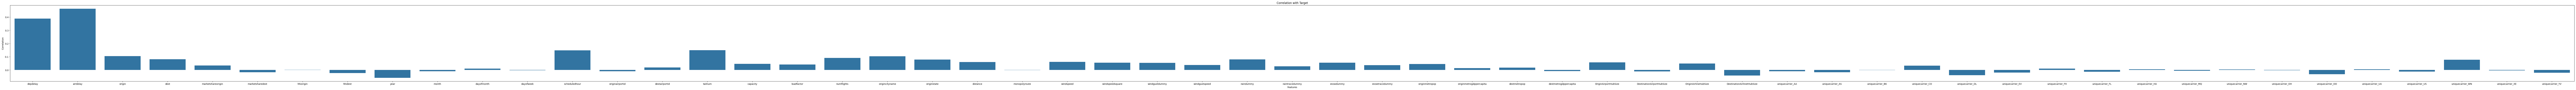

In [ ]:
numeric_features = df_encoded.select_dtypes(include=np.number).columns
target_correlations = df_encoded[numeric_features].corr()['target'].drop('target')
plt.figure(figsize=(200, 6))
sns.barplot(x=target_correlations.index, y=target_correlations.values)
plt.title('Correlation with Target')
plt.xlabel('Features')
plt.ylabel('Correlation')

In [ ]:
df.drop(columns=[
    'hhiorigin', 'dayofweek' , 'monopolyroute' , 'originmetrogdppercapita' , 'destmetrogdppercapita'
    , 'uniquecarrier_HA','uniquecarrier_UA','uniquecarrier_NW', 'uniquecarrier_OH',
      'uniquecarrier_XE','uniquecarrier_B6',
    ] , inplace=True)

# **9. Preprocessing**

In [ ]:
X=df.drop(['target'],axis=1)
y=df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , shuffle=True)

In [ ]:
target_encoder = ce.TargetEncoder(cols=['origincityname', 'originstate', 'origin', 'dest', 'tailnum'])

X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

In [ ]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# **10. Modeling**

1- The algorithms:

      a. Decision Trees

      b. Naïve Bayes

      c. Logistic Regression

      d. Neural networks




*   Decision Tree




In [ ]:
decision_tree = DecisionTreeClassifier(random_state=1032)

decision_tree.fit(X_train_encoded, y_train)

predictions = decision_tree.predict(X_test_encoded)

print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Cross-validation scores: [1. 1. 1. 1. 1.]
Average CV Score: 1.000 (+/- 0.000)

Best Model Results:
Accuracy: 1.0

Confusion Matrix:
[[119802      0]
 [     0 120439]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119802
           1       1.00      1.00      1.00    120439

    accuracy                           1.00    240241
   macro avg       1.00      1.00      1.00    240241
weighted avg       1.00      1.00      1.00    240241



In [ ]:
print(f"Train Accuracy: {decision_tree.score(X_train_encoded, y_train)}")
print(f"Test Accuracy: {decision_tree.score(X_test_encoded, y_test)}")

Train Accuracy: 1.0
Test Accuracy: 1.0


<Axes: >

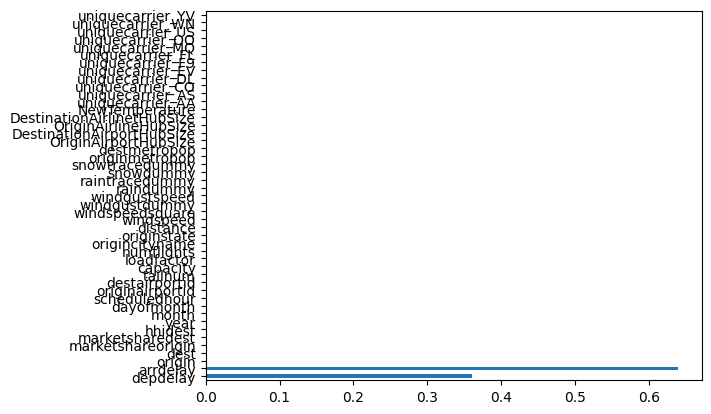

In [ ]:
target_column = 'target'

column_names = [col for col in df.columns if col != target_column]
(pd.Series(decision_tree.feature_importances_, index=column_names).plot(kind='barh'))



*   Logistic Regression



In [ ]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000 , class_weight='balanced')

logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Cross-Validation Results:
Train Accuracy: 0.9242
Test Accuracy: 0.9241
Test Precision: 0.9359
Test Recall: 0.9113
Test F1 Score: 0.9235

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92    119802
           1       0.93      0.91      0.92    120439

    accuracy                           0.92    240241
   macro avg       0.92      0.92      0.92    240241
weighted avg       0.92      0.92      0.92    240241


Confusion Matrix:
[[112084   7718]
 [ 10830 109609]]


In [ ]:
print(f"Train Accuracy: {logistic_model.score(X_train_scaled, y_train)}")
print(f"Test Accuracy: {logistic_model.score(X_test_scaled, y_test)}")

Train Accuracy: 0.9241687765293773
Test Accuracy: 0.922794194163361




*   Naïve Bayes



In [ ]:
nb_classifier2 = GaussianNB()

nb_classifier2.fit(X_train_scaled, y_train)

y_pred = nb_classifier2.predict(X_test_scaled)

print("Naive Bayes Classification Results:")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.81126784 0.81021681 0.80929586 0.80856643 0.80923243]
Average CV Score: 0.810 (+/- 0.002)
Naive Bayes Classification Results:

Accuracy: 0.8107733484292856

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83    119802
           1       0.92      0.68      0.78    120439

    accuracy                           0.81    240241
   macro avg       0.83      0.81      0.81    240241
weighted avg       0.83      0.81      0.81    240241


Confusion Matrix:
[[113171   6631]
 [ 38829  81610]]


In [ ]:
print(f"Train Accuracy: {nb_classifier2.score(X_train_scaled, y_train)}")
print(f"Test Accuracy: {nb_classifier2.score(X_test_scaled, y_test)}")

Train Accuracy: 0.8097491786884615
Test Accuracy: 0.8107733484292856




*   Neural networks



In [ ]:
model = Sequential()

model.add(Dense(
    47,
    activation='relu',
    kernel_initializer='he_uniform',
    kernel_regularizer=L2(0.01),
    input_shape=(47,)
))

model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=[Accuracy(), Precision(), Recall()])

In [ ]:
model.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100
30031/30031 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 0.2187 - loss: 0.1479 - precision_1: 0.9737 - recall_1: 0.9565 - val_accuracy: 0.3468 - val_loss: 0.0405 - val_precision_1: 0.9894 - val_recall_1: 0.9918
Epoch 2/100
30031/30031 ━━━━━━━━━━━━━━━━━━━━ 137s 3ms/step - accuracy: 0.3493 - loss: 0.0375 - precision_1: 0.9923 - recall_1: 0.9930 - val_accuracy: 0.3543 - val_loss: 0.0546 - val_precision_1: 0.9994 - val_recall_1: 0.9762
Epoch 3/100
30031/30031 ━━━━━━━━━━━━━━━━━━━━ 135s 3ms/step - accuracy: 0.3634 - loss: 0.0374 - precision_1: 0.9924 - recall_1: 0.9928 - val_accuracy: 0.3731 - val_loss: 0.0338 - val_precision_1: 0.9901 - val_recall_1: 0.9967
Epoch 4/100
30031/30031 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - accuracy: 0.3648 - loss: 0.0373 - precision_1: 0.9924 - recall_1: 0.9931 - val_accuracy: 0.3736 - val_loss: 0.0320 - val_precision_1: 0.9895 - val_recall_1: 0.9985
Epoch 5/100
30031/30031 ━━━━━━━━━━━━━━━━━━━━ 86s 3ms/step - accuracy: 0.3685 - loss: 0.0375 - precisio

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 47)                  │           2,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,013 (50.84 KB)

 Trainable params: 4,337 (16.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,676 (33.89 KB)

In [ ]:
Model_trial_results=pd.DataFrame(model.history.history)
Model_trial_results.head()

,accuracy,loss,precision_1,recall_1,val_accuracy,val_loss,val_precision_1,val_recall_1
0,0.295506,0.068851,0.986968,0.982419,0.346814,0.040488,0.989422,0.991788
1,0.353763,0.037555,0.992229,0.993086,0.354257,0.054559,0.999354,0.976245
2,0.361892,0.037194,0.992421,0.992958,0.373088,0.033759,0.990061,0.996679
3,0.364176,0.036970,0.992562,0.993124,0.373625,0.031986,0.989484,0.998489
4,0.370701,0.037539,0.992293,0.992846,0.370873,0.028488,0.998365,0.993823


<Axes: >

<Figure size 1200x800 with 0 Axes>

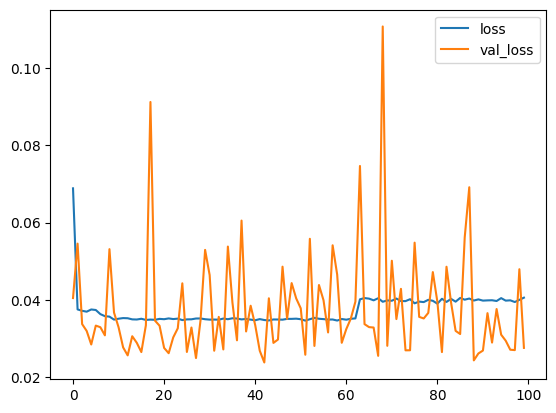

In [ ]:
plt.figure(figsize=(12,8))
Model_trial_results[['loss','val_loss']].plot()

<Axes: >

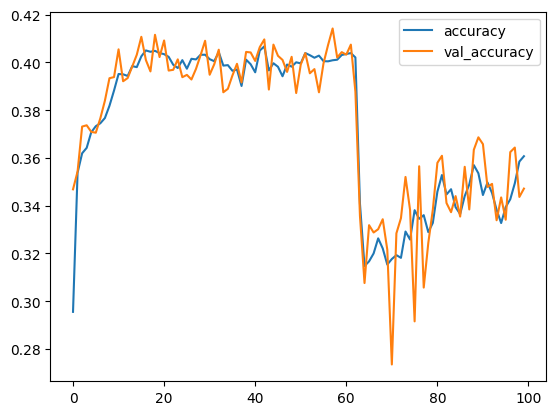

In [ ]:
Model_trial_results[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(X_train_scaled,y_train)

30031/30031 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.3482 - loss: 0.0274 - precision_1: 0.9963 - recall_1: 0.9973


[0.02738093212246895,
 0.3476564586162567,
 0.9963802695274353,
 0.9971917867660522]

In [ ]:
model.evaluate(X_test_scaled,y_test)

7508/7508 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.3470 - loss: 0.0273 - precision_1: 0.9968 - recall_1: 0.9971


[0.027612514793872833,
 0.34710976481437683,
 0.996357798576355,
 0.9971188902854919]